In [5]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
words = ['abc','cba','bca','bac']

In [2]:
chars = sorted(list(set(''.join(words))))
stoi = { s:i+1 for i,s in enumerate(chars)}
stoi['.']=0
itos = {i:s for s,i in stoi.items()}
print(itos)

{1: 'a', 2: 'b', 3: 'c', 0: '.'}


In [8]:
block_size = 3
X, Y = [], []
for w in words:
    context = [0]* block_size
    for ch in w+'.':
        ix = stoi[ch]
        X.append(context)
        Y.append(ix)
        print(''.join(itos[i] for i in context), '--->', itos[ix])
        context = context[1:] + [ix]
        
X = torch.tensor(X)
Y = torch.tensor(Y)

... ---> a
..a ---> b
.ab ---> c
abc ---> .
... ---> c
..c ---> b
.cb ---> a
cba ---> .
... ---> b
..b ---> c
.bc ---> a
bca ---> .
... ---> b
..b ---> a
.ba ---> c
bac ---> .


In [7]:
X.shape, X.dtype, Y.shape, Y.dtype

(torch.Size([16, 3]), torch.int64, torch.Size([16]), torch.int64)

In [9]:
C = torch.randn((len(itos),2))

In [14]:
X

tensor([[0, 0, 0],
        [0, 0, 1],
        [0, 1, 2],
        [1, 2, 3],
        [0, 0, 0],
        [0, 0, 3],
        [0, 3, 2],
        [3, 2, 1],
        [0, 0, 0],
        [0, 0, 2],
        [0, 2, 3],
        [2, 3, 1],
        [0, 0, 0],
        [0, 0, 2],
        [0, 2, 1],
        [2, 1, 3]])

In [29]:
C[X][-1]

tensor([[-1.7356,  0.1429],
        [-0.2063, -1.0008],
        [ 0.7851, -0.4433]])

In [31]:
wt = torch.randn((6,2))

In [32]:
b = torch.randn(2)

In [34]:
wt,b

(tensor([[ 1.5338,  0.5783],
         [-0.5572,  0.8347],
         [-0.0135, -0.0359],
         [ 0.2412,  0.7133],
         [ 1.0508, -0.3605],
         [ 0.0854, -1.1809]]),
 tensor([-1.9076,  0.0850]))

In [35]:
emb = C[X]
emb.shape

torch.Size([16, 3, 2])

In [36]:
h = torch.tanh(emb.view(-1,6) @ wt + b)

In [52]:
w2 = torch.randn((2,4))
b2 = torch.randn(4)

In [53]:
logits = h @ w2 + b2

In [54]:
counts = logits.exp()

In [55]:
logits

tensor([[ 1.0440,  3.2914, -0.5886,  1.9413],
        [ 1.0435,  3.3502, -0.5759,  2.3273],
        [ 1.0432,  3.4110, -0.5634,  2.7248],
        [ 0.8769,  2.9336, -0.1834,  1.7532],
        [ 1.0440,  3.2914, -0.5886,  1.9413],
        [ 1.0424,  3.4101, -0.5614,  2.7293],
        [ 1.0432,  3.3993, -0.5658,  2.6483],
        [ 0.8428,  2.5057, -0.1684, -0.5793],
        [ 1.0440,  3.2914, -0.5886,  1.9413],
        [ 1.0432,  3.4060, -0.5644,  2.6926],
        [ 1.0422,  3.3799, -0.5664,  2.5366],
        [ 1.0451,  3.1323, -0.6219,  0.8991],
        [ 1.0440,  3.2914, -0.5886,  1.9413],
        [ 1.0432,  3.4060, -0.5644,  2.6926],
        [ 1.0444,  3.2195, -0.6033,  1.4719],
        [ 1.0431,  3.3834, -0.5684,  2.5479]])

In [56]:
counts = logits.exp()
counts

tensor([[ 2.8406, 26.8809,  0.5551,  6.9676],
        [ 2.8392, 28.5070,  0.5622, 10.2505],
        [ 2.8382, 30.2942,  0.5693, 15.2534],
        [ 2.4034, 18.7943,  0.8324,  5.7731],
        [ 2.8406, 26.8809,  0.5551,  6.9676],
        [ 2.8360, 30.2695,  0.5704, 15.3218],
        [ 2.8384, 29.9427,  0.5679, 14.1302],
        [ 2.3229, 12.2516,  0.8451,  0.5603],
        [ 2.8406, 26.8809,  0.5551,  6.9676],
        [ 2.8383, 30.1459,  0.5687, 14.7706],
        [ 2.8353, 29.3667,  0.5675, 12.6371],
        [ 2.8437, 22.9277,  0.5369,  2.4575],
        [ 2.8406, 26.8809,  0.5551,  6.9676],
        [ 2.8383, 30.1459,  0.5687, 14.7706],
        [ 2.8417, 25.0166,  0.5470,  4.3575],
        [ 2.8379, 29.4714,  0.5664, 12.7805]])

In [57]:
prob = counts / counts.sum(1,keepdims = True)

In [58]:
prob

tensor([[0.0763, 0.7217, 0.0149, 0.1871],
        [0.0673, 0.6762, 0.0133, 0.2431],
        [0.0580, 0.6188, 0.0116, 0.3116],
        [0.0864, 0.6760, 0.0299, 0.2076],
        [0.0763, 0.7217, 0.0149, 0.1871],
        [0.0579, 0.6178, 0.0116, 0.3127],
        [0.0598, 0.6306, 0.0120, 0.2976],
        [0.1454, 0.7667, 0.0529, 0.0351],
        [0.0763, 0.7217, 0.0149, 0.1871],
        [0.0587, 0.6238, 0.0118, 0.3057],
        [0.0624, 0.6467, 0.0125, 0.2783],
        [0.0989, 0.7970, 0.0187, 0.0854],
        [0.0763, 0.7217, 0.0149, 0.1871],
        [0.0587, 0.6238, 0.0118, 0.3057],
        [0.0867, 0.7636, 0.0167, 0.1330],
        [0.0622, 0.6455, 0.0124, 0.2799]])

In [59]:
Y

tensor([1, 2, 3, 0, 3, 2, 1, 0, 2, 3, 1, 0, 2, 1, 3, 0])

In [63]:
-prob[torch.arange(16), Y].log().mean()

tensor(2.1495)

In [106]:
g = torch.Generator().manual_seed(2147483647)
C = torch.randn((4,2), generator = g)
w1 = torch.randn((6,2), generator = g)
b1 = torch.randn(2, generator = g)
w2 = torch.randn((2, 4), generator = g)
b2 = torch.randn(4, generator = g)
parameters = [C,w1,b1,w2,b2]

In [107]:
for p in parameters:
    p.requires_grad = True

In [108]:
lri = []
lossi = []
stepi = []

Iteration 0
-------------------------------------------------------


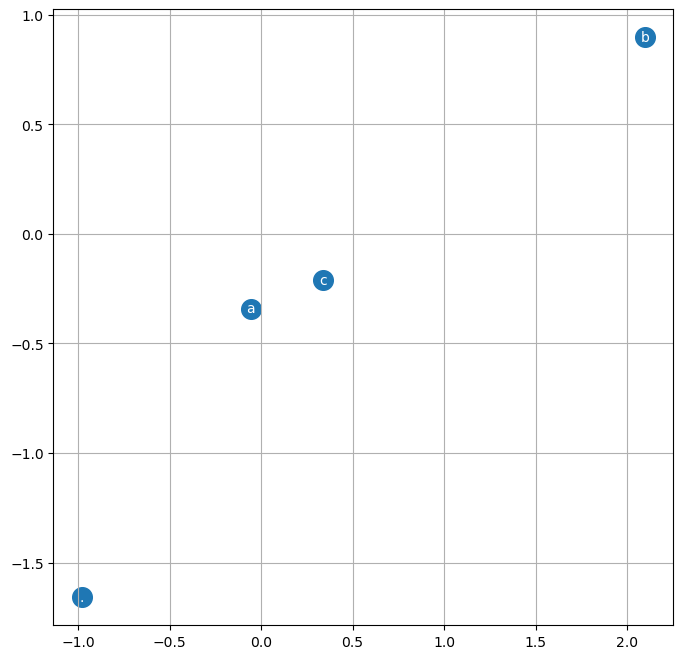

Iteration 1
-------------------------------------------------------


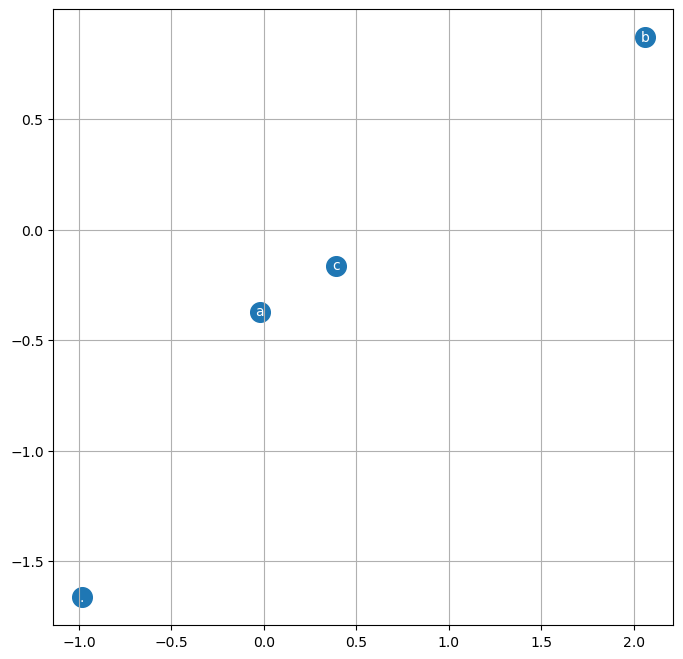

Iteration 2
-------------------------------------------------------


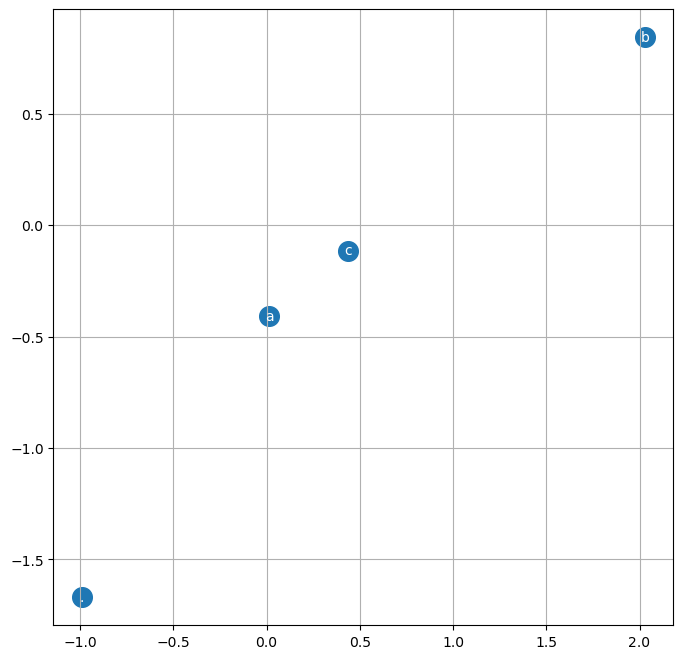

Iteration 3
-------------------------------------------------------


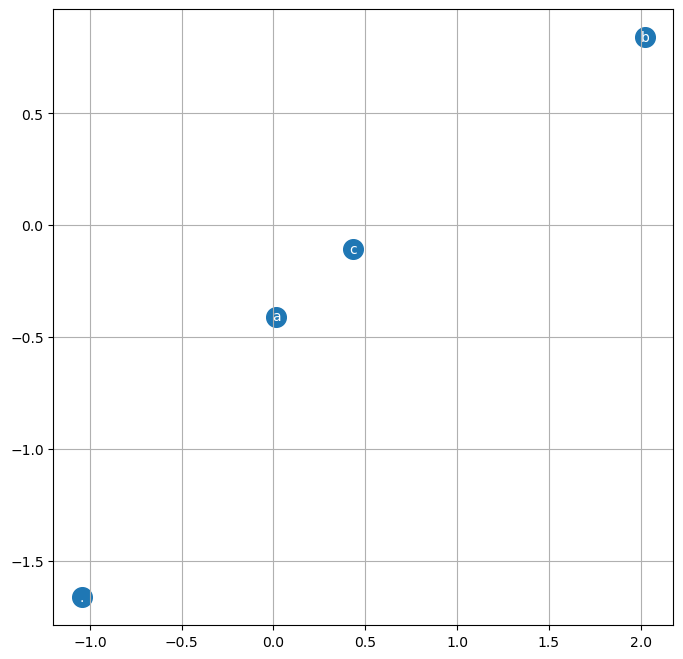

Iteration 4
-------------------------------------------------------


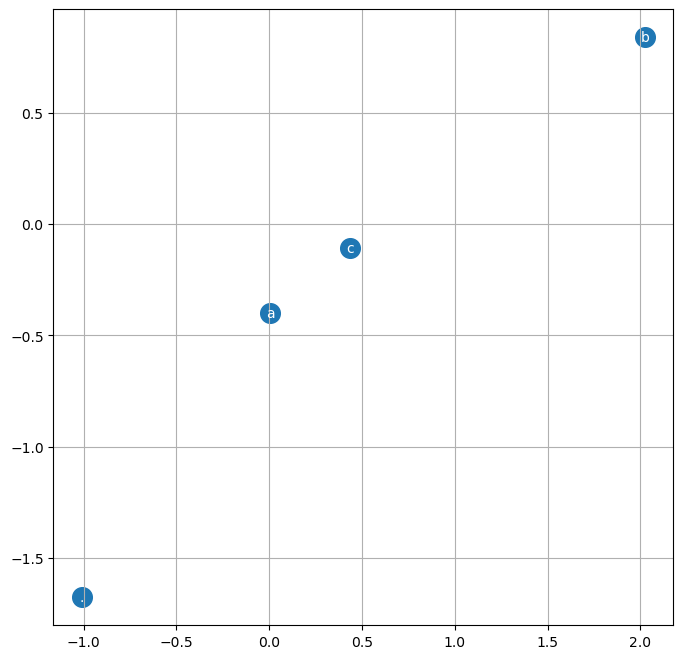

In [109]:
for i in range(5):
    ix = torch.randint(0,X.shape[0],(4,))
    print('Iteration',i)
    #print('Ix = ',ix)

    emb = C[X[ix]]
    #print('Emb = ', emb.shape)
    h = torch.tanh(emb.view(-1, 6) @ w1 + b1)
    #print('H = ',h)
    logits = h @ w2 + b2
    #print('Logits = ',logits)
    loss = F.cross_entropy(logits, Y[ix])
    #print('L = ',loss)
    print("-------------------------------------------------------")
    # backward pass
    for p in parameters:
        p.grad = None
    loss.backward()

    plt.figure(figsize = (8,8))
    plt.scatter(C[:,0].data, C[:,1].data, s=200)
    for i in range(C.shape[0]):
        plt.text(C[i,0].item(), C[i,1].item(), itos[i], ha = 'center', va = 'center', color='white')
    plt.grid('minor')
    plt.show()
    lr = 0.1
    for p in parameters:
        p.data += -lr * p.grad
    stepi.append(i)
    lossi.append(loss.log10().item())

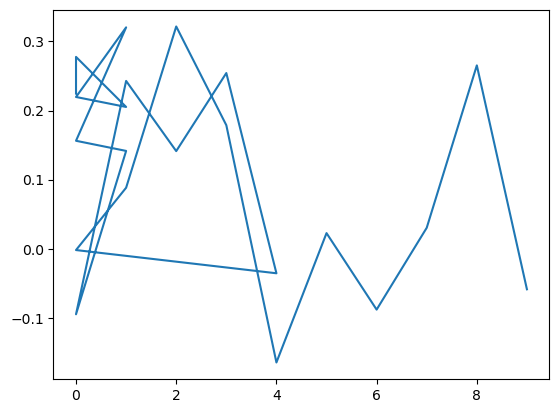

In [95]:
plt.plot(stepi,lossi)

In [82]:
parameters

[tensor([[ 1.5674e+00, -2.3729e-01, -2.7385e-02, -1.1008e+00,  2.8588e-01,
          -2.9643e-02, -1.5471e+00,  6.0489e-01,  7.9136e-02,  9.0462e-01],
         [-4.7125e-01,  7.8682e-01, -3.2843e-01, -4.3297e-01,  1.3729e+00,
           2.9334e+00,  1.5618e+00, -1.6261e+00,  6.7716e-01, -8.4039e-01],
         [ 9.8488e-01, -1.4837e-01, -1.4795e+00,  4.4830e-01, -7.0730e-02,
           2.4968e+00,  2.4448e+00, -6.7006e-01, -1.2199e+00,  3.0314e-01],
         [-1.0725e+00,  7.2762e-01,  5.1114e-02,  1.3095e+00, -8.0220e-01,
          -8.5042e-01, -1.8068e+00,  1.2523e+00, -1.2256e+00,  1.2165e+00],
         [-9.6478e-01, -2.3211e-01, -3.4762e-01,  3.3244e-01, -1.3263e+00,
           1.1224e+00,  5.9641e-01,  4.5846e-01,  5.4011e-02, -1.7400e+00],
         [ 1.1560e-01,  8.0319e-01,  5.4108e-01, -1.1646e+00,  1.4756e-01,
          -1.0006e+00,  3.8012e-01,  4.7328e-01, -9.1027e-01, -7.8305e-01],
         [ 1.3506e-01, -2.1161e-01, -1.0406e+00, -1.5367e+00,  9.3743e-01,
          -8.8303e-

In [117]:
context = [0] * block_size
C[torch.tensor([context])].shape

torch.Size([1, 3, 2])

In [118]:
g = torch.Generator()
for _ in range(20):
    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])]
        h = torch.tanh(emb.view(1,-1) @ w1 + b1)
        logits = h @ w2 + b2
        probs = F.softmax(logits, dim = 1)
        ix = torch.multinomial(probs, num_samples = 1, generator = g).item()
        context = context[1:] + [ix]
        if ix == 0:
            break
        out.append(ix)
    print(''.join(itos[i] for i in out))

cbbbacacbbbc
b
bb
ab
ba
aa
b
bbacbb
bbabcacc

bcacb
aacbbc
ba
ba
bbbacb
b
ab
b
ba
bbbca
